<a href="https://colab.research.google.com/github/535amar/CMP7005_Programming-for-Data-Analysis_S1_25/blob/main/Simple_Linear_Regression_Workshop_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective of the Workshop**
The objective of this workshop is to provide students with hands-on experience in applying linear and multiple regression techniques to analyze environmental data. By working with real-world climate and ecosystem variables, students will gain insights into how regression models can be used to identify relationships between key environmental factors, make predictions, and support data-driven decision-making.

**Through this workshop, you will:**

* Understand the concepts of linear and multiple regression and their applications in environmental science.
* Explore feature selection and correlation analysis to determine key influencing factors.
* Implement regression models using Python (Pandas, Scikit-learn, and Matplotlib/Seaborn).
* Evaluate model performance using metrics such as R-squared and Mean Squared Error (MSE).
* Interpret regression outputs and derive meaningful conclusions from the results.

## Importing the required packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split

### Task 1 Import Wetland data and create a Pandas DataFrame

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive/Colab/Programming for Data Analysis"
# please change the path according to the location of your data

/content/drive/MyDrive/Colab/Programming for Data Analysis


In [5]:
ls

Assessment/  FuelConsumption.csv


# **Reading the FuelConsumption data**

In [6]:
df=pd.read_csv('FuelConsumption.csv')

## Data exploration

###  Task 2: Inspect the first few rows of the DataFrame and summarise the descriptive statistics of the data

In [7]:
# Summarise the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


## Task 3: Plot to check whether the relationship between the independent and dependent variable is linear or not

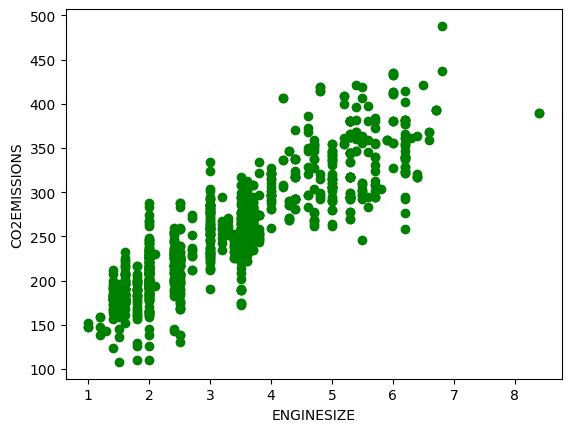

In [10]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS, color='green')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

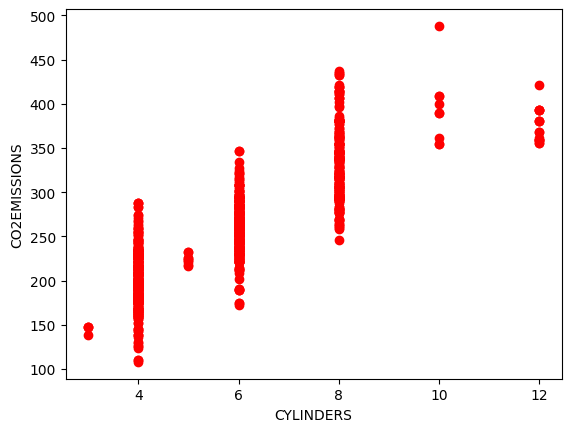

In [11]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

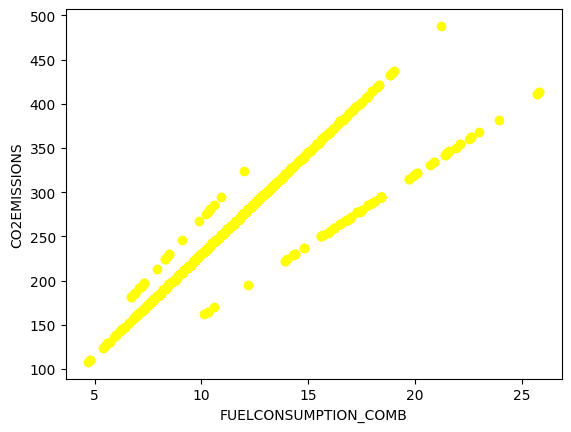

In [13]:
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS, color='yellow')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()


Which of the above variables do you think will work best to explain a linear relation with CO2 emission?

## Task 4: Train-test data preparation

In [14]:
X=df[['ENGINESIZE']]
X


,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [15]:
y=df[['CO2EMISSIONS']]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print(X_train)

     ENGINESIZE
302         3.6
159         3.6
886         2.7
777         6.2
250         1.8
..          ...
689         3.0
877         3.8
942         2.0
419         5.0
736         4.7

[853 rows x 1 columns]


In [18]:
print(X_test)

     ENGINESIZE
299         5.7
482         2.4
139         3.0
348         4.6
248         1.4
..          ...
716         2.5
965         4.0
836         2.5
616         1.6
514         2.4

[214 rows x 1 columns]


In [19]:
print(y_train)

     CO2EMISSIONS
302           258
159           251
886           212
777           380
250           182
..            ...
689           292
877           244
942           196
419           292
736           264

[853 rows x 1 columns]


In [20]:
print(X_test)

     ENGINESIZE
299         5.7
482         2.4
139         3.0
348         4.6
248         1.4
..          ...
716         2.5
965         4.0
836         2.5
616         1.6
514         2.4

[214 rows x 1 columns]


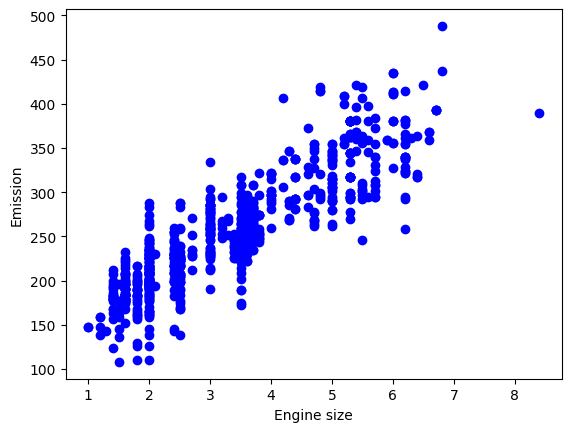

In [21]:
# Train data distribution
plt.scatter(X_train,y_train, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Task 5: Using sklearn package for data modelling

In [22]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[39.27735881]]
Intercept: [124.86650516]


Text(0, 0.5, 'Emission')

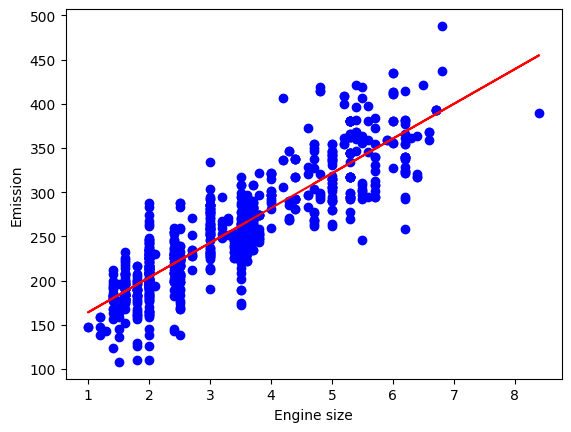

In [23]:
# Plot outputs
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Task 6: Model evaluation

In [24]:
from sklearn.metrics import r2_score
test_y_ = regr.predict(X_test)

In [25]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 24.68
Residual sum of squares (MSE): 1085.19
R2-score: 0.63
